In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

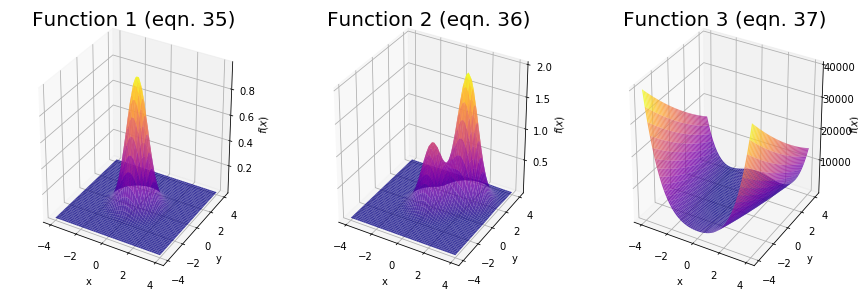

In [3]:
def function1(x, y):
    '''
    First function defined in the lab manual
    
    Params:
        x - (array-like) x position of point
        y - (array-like) y position of point    
    Returns:
        - (array-like) value of function at coordinates.
    ''' 
    return np.exp(-(x**2+ y**2))

def function2(x, y):
    '''
    Second function defined in the lab manual
    
    Params:
        x - (array-like) x position of point
        y - (array-like) y position of point    
    Returns:
        - (array-like) value of function at coordinates.
    ''' 
    return function1(x,y) + 2*np.exp(-np.abs((x-1.7)**2+(y-1.7)**2))

def function3(x, y):
    '''
    Third function defined in the lab manual
    
    Params:
        x - (array-like) x position of point
        y - (array-like) y position of point    
    Returns:
        - (array-like) value of function at coordinates.
    ''' 
    return (1-x)**2 + 100*(y-x**2)**2

x = np.linspace(-4, 4)
xx, yy = np.meshgrid(x, x)

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(xx, yy, function1(xx, yy), alpha=0.8, cmap=cm.plasma)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$f(x)$')
ax.set_title('Function 1 (eqn. 35)', fontsize=20)

ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(xx, yy, function2(xx, yy), alpha=0.8, cmap=cm.plasma)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$f(x)$')
ax.set_title('Function 2 (eqn. 36)', fontsize=20)

ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(xx, yy, function3(xx, yy), alpha=0.8, cmap=cm.plasma)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$f(x)$')
ax.set_title('Function 3 (eqn. 37)', fontsize=20);

In [9]:
def geometric_temp_schedule(t, n, T_0, T_f):
    '''
    Geometric temperature schedule for simulated annealing algorithms
    
    Params:
        t - (float) Time, or number of steps, at current iteration
        n - (float) Total time or number of steps being taken  
        T_0 - (float) Initial temperature
        T_f - (float) Final temperature
    Returns:
        - (float) Temperature at this point in time
    ''' 
    return np.maximum(T_0*np.power(T_f/T_0, t/n), T_f)

def wrap_boundaries(position, xlims, x_period, ylims, y_period):
    '''
    Wraps the boundaries for specified boundary conditions
    
    Params:
        position - (tuple) x and y coordinates of position. None if no limits.
        xlims - (tuple) Max and min of x interval 
        x_period - (float) Length of x interval
        ylims - (tuple) Max and min of y interval
        x_period - (float) Length of y interval
    Returns:
        position - (tuple) Wrapped x values
    ''' 
    if xlims != None: 
        temp_x = position[0] - xlims[0]
        temp_x = temp_x % x_period
        position[0] = temp_x + xlims[1] if temp_x < 0 else temp_x + xlims[0]
        
    if ylims != None: 
        temp_y = position[1] - ylims[0]
        temp_y = temp_y % y_period
        position[1] = temp_y + ylims[1] if temp_y < 0 else temp_y + ylims[0]
    
    return position

def coin_flip(current_cost, T):
    '''
    Randomly returns true or false based on the ratio of a cost to temperature
    
    Params:
        current_cost - (float) Current cost value of a function
        T - (float) Current temperature of the system
    Returns:
        - (bool) Random decision
    ''' 
    return np.random.random() < np.exp(current_cost/T)

def simulated_annealing_2d(fn, T_0=100, T_f=1e-9, temp_schedule_fn=geometric_temp_schedule,
                           initial_pos=(0,0), nsweeps=10, nsteps=100, searching_for='maxima',
                           xlims=None, ylims=None):
    '''
    Simulated annealing method to find the maxima or minima of an arbitrary function.
    
    Params:
        fn - (function) Arbitrary function to optimise
        T_0 - (float) Optional. Initial temperature of the system
        T_f - (float) Optional. Final temperature of the system
        temp_schedule_fn - (Function) Optional. Temperature schedule
        initial_pos - (tuple) Optional. Inital position in function
        nsweeps - (int) Optional. Number of sweeps at each temperature
        nsteps - (int) Optional. Number of steps with new temperatures
        searching_for - (string) Optional. Switch to find max or min.
        xlims - (tuple) Optional. X limits of search range
        ylims - (tuple) Optional. Y limits of search range
    Returns:
        pos - (tuple) Best solution as found after cooling
    ''' 
    # Flip function values if looking for a minimum
    optimization_multiplier = -1 if searching_for == 'maxima' else 1
    # The function is our cost function
    cost = fn(*initial_pos)*optimization_multiplier
    pos = initial_pos
    T = T_0
    x_period = xlims[1]-xlims[0] if xlims != None else 0
    y_period = ylims[1]-ylims[0] if ylims != None else 0
    
    for i in range(nsteps):
        for j in range(nsweeps):
            # Generate random position to check
            temp_pos = wrap_boundaries(np.random.randn(2), xlims, x_period, ylims, y_period)
            temp_cost = fn(*temp_pos)*optimization_multiplier
            
            # If an obviously good choice or by coin flip, update position and min cost
            if (temp_cost <= cost) or coin_flip(cost-temp_cost, T):
                pos = list(temp_pos)
                cost = temp_cost
                
        # Cool temperature
        T = temp_schedule_fn(i, nsteps, T_0, T_f)
        
    return pos

In [11]:
fn1_max_coords = simulated_annealing_2d(function1, xlims=(-4,4), ylims=(-4,4))
print("Local maxima found at coords", fn1_max_coords, "with value", function1(*fn1_max_coords),"\nExpected was", function1(0,0))

fn1_min_coords = simulated_annealing_2d(function1, xlims=(-4,4), ylims=(-4,4), searching_for='minima')
print("Local minima found at coords", fn1_min_coords, "with value", function1(*fn1_min_coords),". Expected was 0.")

Local maxima found at coords [0.023823850078237285, -0.011866383128083857] with value 0.999291863966 
Expected was 1.0
Local minima found at coords [3.4309205314633306, 1.3129002906759961] with value 1.37793732847e-06 . Expected was 0.


In [12]:
fn2_max_coords = simulated_annealing_2d(function2, xlims=(-4,4), ylims=(-4,4))
print("Local maxima found at coords", fn2_max_coords, "with value", function2(*fn2_max_coords),"\nExpected was", function2(1.7,1.7))

fn2_min_coords = simulated_annealing_2d(function2, xlims=(-4,4), ylims=(-4,4), searching_for='minima')
print("Local minima found at coords", fn2_min_coords, "with value", function2(*fn2_min_coords),". Expected was 0.")

Local maxima found at coords [1.875681831023468, 1.6018306485721254] with value 1.92289472227 
Expected was 2.00308871541
Local minima found at coords [-1.9447295702957108, 2.6228760187442184] with value 2.48829194481e-05 . Expected was 0.


In [13]:
fn3_max_coords = simulated_annealing_2d(function3, xlims=(-4,4), ylims=(-4,4))
print("Local maxima found at coords", fn3_max_coords, "with value", function3(*fn3_max_coords),". Expected was approx. 40025")

fn3_min_coords = simulated_annealing_2d(function3, xlims=(-4,4), ylims=(-4,4), searching_for='minima')
print("Local minima found at coords", fn3_min_coords, "with value", function3(*fn3_min_coords),". Expected was 0.")

Local maxima found at coords [-3.316274502318016, -0.10097956138919839] with value 12336.6470283 . Expected was approx. 40025
Local minima found at coords [1.1706955693996033, 1.3774047350081062] with value 0.0338657660195 . Expected was 0.


In [10]:
print("Runtime of simulated annealing on function 1:")
%timeit simulated_annealing_2d(function1, xlims=(-4,4), ylims=(-4,4))
print("Runtime of simulated annealing on function 2:")
%timeit simulated_annealing_2d(function2, xlims=(-4,4), ylims=(-4,4))
print("Runtime of simulated annealing on function 3:")
%timeit simulated_annealing_2d(function3, xlims=(-4,4), ylims=(-4,4))

Runtime of simulated annealing on function 1:
18.5 ms ± 44.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Runtime of simulated annealing on function 2:
25 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Runtime of simulated annealing on function 3:
16.4 ms ± 48 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
